In [1]:
import json
import argparse
from tqdm import tqdm

In [3]:
INPUT_JSON_PATH = "../data/raw/333.v1i.coco/train/_annotations.coco.json"
OUTPUT_JSON_PATH = "new_annotations.coco.json"
CLASS_NAME_TO_KEEP = ""

In [6]:
# đọc json
print(f"Dang tai du lieu {INPUT_JSON_PATH}...")
with open(INPUT_JSON_PATH, 'r') as f:
    json_data  = json.load(f)
json_data

Dang tai du lieu ../data/raw/333.v1i.coco/train/_annotations.coco.json...


{'info': {'year': '2024',
  'version': '1',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2024-03-21T15:48:50+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': '111', 'supercategory': 'none'},
  {'id': 1, 'name': 'A10', 'supercategory': '111'},
  {'id': 2, 'name': 'A400M', 'supercategory': '111'},
  {'id': 3, 'name': 'AG600', 'supercategory': '111'},
  {'id': 4, 'name': 'AV8B', 'supercategory': '111'},
  {'id': 5, 'name': 'B1', 'supercategory': '111'},
  {'id': 6, 'name': 'B2', 'supercategory': '111'},
  {'id': 7, 'name': 'B52', 'supercategory': '111'},
  {'id': 8, 'name': 'Be200', 'supercategory': '111'},
  {'id': 9, 'name': 'C130', 'supercategory': '111'},
  {'id': 10, 'name': 'C17', 'supercategory': '111'},
  {'id': 11, 'name': 'C2', 'supercategory': '111'},
  {'id': 12, 'name'

---------------------------------------
Áp dụng các biến đổi:
  - Độ sáng: 50, Độ tương phản: 1.0
  - Lật ngang: Có
  - Lật dọc: Có


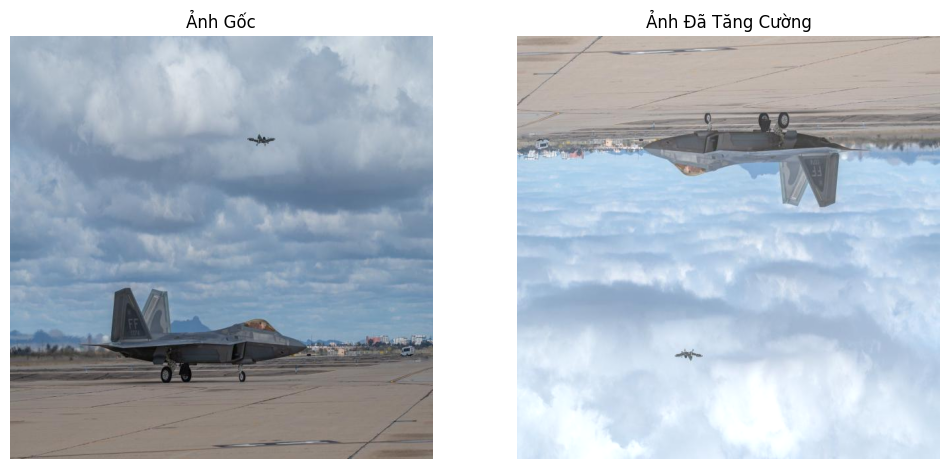

---------------------------------------


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_augmentation_and_display(
    image_path,
    # Các tham số điều chỉnh màu sắc
    brightness_add=50,      # Cộng giá trị này vào từng pixel (0-255). Dương để sáng hơn, âm để tối hơn.
    contrast_multiply=1.0, # Nhân giá trị này với từng pixel. >1 để tăng tương phản, <1 để giảm.
    hsv_h_shift=0,         # Lượng dịch chuyển kênh Hue (0-179 trong OpenCV)
    hsv_s_shift=0,         # Lượng dịch chuyển kênh Saturation (0-255)
    hsv_v_shift=0,         # Lượng dịch chuyển kênh Value (0-255)

    # Các tham số biến đổi hình học
    rotation_degrees=0.0,    # Góc xoay ảnh theo độ
    translate_x_ratio=0.0, # Dịch chuyển theo trục X (tỷ lệ của chiều rộng ảnh)
    translate_y_ratio=0.0, # Dịch chuyển theo trục Y (tỷ lệ của chiều cao ảnh)
    scale_factor=1.0,      # Tỷ lệ phóng to/thu nhỏ (>1 phóng to, <1 thu nhỏ)
    shear_degrees=0.0,     # Góc cắt xiên ảnh theo độ
    perspective_strength=0.0, # Cường độ biến đổi phối cảnh (0.0-1.0)
    apply_fliplr=True,    # Áp dụng lật ngang (True/False)
    apply_flipud=True     # Áp dụng lật dọc (True/False)
):
    """
    Áp dụng các kỹ thuật tăng cường dữ liệu tùy chỉnh với cường độ xác định
    và hiển thị ảnh gốc cùng ảnh đã được tăng cường.
    """
    img_original = cv2.imread(image_path)
    if img_original is None:
        print(f"Lỗi: Không thể đọc ảnh từ đường dẫn: {image_path}")
        return

    # Chuyển đổi ảnh gốc sang RGB để hiển thị đúng màu trong Matplotlib
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
    img_augmented = img_original.copy() # Tạo một bản sao để áp dụng các biến đổi
    H, W, _ = img_augmented.shape # Lấy chiều cao và chiều rộng của ảnh

    print("---------------------------------------")
    print("Áp dụng các biến đổi:")

    # --- 0. Điều chỉnh Độ sáng và Độ tương phản ---
    # Sử dụng cv2.convertScaleAbs(src, alpha, beta) để điều chỉnh độ tương phản (alpha) và độ sáng (beta)
    # Ảnh được chuyển sang float để tính toán, sau đó chuyển lại về uint8.
    if brightness_add != 0 or contrast_multiply != 1.0:
        img_augmented = cv2.convertScaleAbs(img_augmented, alpha=contrast_multiply, beta=brightness_add)
        print(f"  - Độ sáng: {brightness_add}, Độ tương phản: {contrast_multiply}")


    # --- 1. Thay đổi màu sắc (HSV) ---
    if hsv_h_shift != 0 or hsv_s_shift != 0 or hsv_v_shift != 0:
        img_hsv = cv2.cvtColor(img_augmented, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(img_hsv)

        # Điều chỉnh Hue (0-179)
        if hsv_h_shift != 0:
            h = (h + hsv_h_shift) % 180
            h = np.array(h, dtype=np.uint8)
            print(f"  - Dịch chuyển Hue: {hsv_h_shift}")

        # Điều chỉnh Saturation (0-255)
        if hsv_s_shift != 0:
            s = np.clip(s.astype(np.int16) + hsv_s_shift, 0, 255).astype(np.uint8)
            print(f"  - Dịch chuyển Saturation: {hsv_s_shift}")

        # Điều chỉnh Value (Brightness trong HSV) (0-255)
        if hsv_v_shift != 0:
            v = np.clip(v.astype(np.int16) + hsv_v_shift, 0, 255).astype(np.uint8)
            print(f"  - Dịch chuyển Value (độ sáng): {hsv_v_shift}")

        img_hsv_merged = cv2.merge([h, s, v])
        img_augmented = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2BGR)


    # --- 2. Xoay ảnh (Rotation) ---
    if rotation_degrees != 0:
        center = (W // 2, H // 2)
        M_rotate = cv2.getRotationMatrix2D(center, rotation_degrees, 1.0) # 1.0 là tỷ lệ scale (không scale)
        # BORDER_REFLECT_101: Biên được điền bằng cách phản chiếu các pixel
        img_augmented = cv2.warpAffine(img_augmented, M_rotate, (W, H), borderMode=cv2.BORDER_REFLECT_101)
        print(f"  - Xoay: {rotation_degrees} độ")


    # --- 3. Dịch chuyển (Translation) ---
    tx = int(W * translate_x_ratio)
    ty = int(H * translate_y_ratio)
    if tx != 0 or ty != 0:
        M_translate = np.float32([[1, 0, tx], [0, 1, ty]])
        img_augmented = cv2.warpAffine(img_augmented, M_translate, (W, H), borderMode=cv2.BORDER_REFLECT_101)
        print(f"  - Dịch chuyển: X={tx}px, Y={ty}px")


    # --- 4. Tỷ lệ (Scaling) ---
    if scale_factor != 1.0:
        new_W, new_H = int(W * scale_factor), int(H * scale_factor)
        if new_W <= 0 or new_H <= 0:
            print("  - Cảnh báo: Kích thước sau scale không hợp lệ, bỏ qua scale.")
        else:
            img_scaled = cv2.resize(img_augmented, (new_W, new_H), interpolation=cv2.INTER_AREA)

            # Đệm ảnh về kích thước gốc hoặc cắt nếu lớn hơn
            padded_img = np.zeros((H, W, 3), dtype=np.uint8)
            # Tính toán vị trí để đặt ảnh đã scale vào giữa
            x_start = max(0, (W - new_W) // 2)
            y_start = max(0, (H - new_H) // 2)

            # Tính toán kích thước phần ảnh cần dán vào
            paste_w = min(new_W, W - x_start)
            paste_h = min(new_H, H - y_start)

            # Dán ảnh đã scale vào ảnh đệm
            padded_img[y_start:y_start+paste_h, x_start:x_start+paste_w] = \
                img_scaled[0:paste_h, 0:paste_w]

            img_augmented = padded_img
            print(f"  - Tỷ lệ: {scale_factor}")

    # --- 5. Cắt xiên (Shear) ---
    if shear_degrees != 0:
        # Ma trận biến đổi shear. Ở đây là shear theo trục X
        M_shear = np.float32([[1, np.tan(np.deg2rad(shear_degrees)), 0],
                              [0, 1, 0]])
        # Để đảm bảo ảnh không bị cắt, có thể cần tính toán kích thước đầu ra mới
        # Tuy nhiên, để minh họa, chúng ta sẽ giữ kích thước gốc và điền biên
        img_augmented = cv2.warpAffine(img_augmented, M_shear, (W, H), borderMode=cv2.BORDER_REFLECT_101)
        print(f"  - Cắt xiên: {shear_degrees} độ")


    # --- 6. Biến đổi phối cảnh (Perspective) ---
    if perspective_strength != 0:
        # 4 điểm gốc trên ảnh (các góc)
        pts1 = np.float32([[0, 0], [W, 0], [0, H], [W, H]])
        # 4 điểm đích (dịch chuyển các góc để tạo phối cảnh)
        # Dịch chuyển các góc vào trong để tạo hiệu ứng phối cảnh thu nhỏ về trung tâm
        shift_x = W * perspective_strength / 2
        shift_y = H * perspective_strength / 2
        pts2 = np.float32([[0 + shift_x, 0 + shift_y],
                           [W - shift_x, 0 + shift_y],
                           [0 + shift_x, H - shift_y],
                           [W - shift_x, H - shift_y]])

        M_perspective = cv2.getPerspectiveTransform(pts1, pts2)
        img_augmented = cv2.warpPerspective(img_augmented, M_perspective, (W, H), borderMode=cv2.BORDER_REFLECT_101)
        print(f"  - Phối cảnh: cường độ {perspective_strength}")


    # --- 7. Lật ngang (Fliplr) ---
    if apply_fliplr:
        img_augmented = cv2.flip(img_augmented, 1) # 1: lật theo trục Y (ngang)
        print("  - Lật ngang: Có")

    # --- 8. Lật dọc (Flipud) ---
    if apply_flipud:
        img_augmented = cv2.flip(img_augmented, 0) # 0: lật theo trục X (dọc)
        print("  - Lật dọc: Có")

    # Chuyển đổi ảnh đã tăng cường sang RGB để hiển thị
    img_augmented_rgb = cv2.cvtColor(img_augmented, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_original_rgb)
    plt.title("Ảnh Gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_augmented_rgb)
    plt.title("Ảnh Đã Tăng Cường")
    plt.axis('off')

    plt.show()
    print("---------------------------------------")

# --- Cách sử dụng ---
# THAY THẾ 'your_image.jpg' BẰNG ĐƯỜNG DẪN THỰC TẾ ĐẾN ẢNH CỦA BẠN
# Ví dụ: image_path = 'data/images/my_fighter_jet.jpg'
image_path = r'D:\code\projects\fighter_object_detection\data\processed\train\images\37255.jpg' # <--- VUI LÒNG THAY ĐỔI ĐƯỜNG DẪN NÀY

# --- Ví dụ về cách gọi hàm với các cường độ khác nhau ---

# Ví dụ 1: Chỉ tăng độ sáng và giảm độ tương phản
# apply_custom_augmentation_and_display(
#     image_path,
#     brightness_add=50,    # Tăng độ sáng 50 đơn vị
#     contrast_multiply=0.7 # Giảm độ tương phản 30%
# )

# Ví dụ 2: Chỉ xoay và dịch chuyển
# apply_custom_augmentation_and_display(
#     image_path,
#     rotation_degrees=30,  # Xoay 30 độ
#     translate_x_ratio=0.2 # Dịch chuyển 20% chiều rộng sang phải
# )

# Ví dụ 3: Kết hợp nhiều biến đổi (tăng sáng, tăng tương phản, lật ngang, thu nhỏ)
# apply_custom_augmentation_and_display(
#     image_path,
#     brightness_add=30,
#     contrast_multiply=1.3,
#     apply_fliplr=True,
#     scale_factor=0.8,     # Thu nhỏ 20%
#     rotation_degrees=10   # Xoay nhẹ 10 độ
# )

# Ví dụ 4: Biến đổi màu sắc mạnh
# apply_custom_augmentation_and_display(
#     image_path,
#     hsv_h_shift=90,  # Thay đổi hue lớn (nửa vòng tròn màu)
#     hsv_s_shift=100, # Tăng độ bão hòa
#     hsv_v_shift=-50  # Giảm độ sáng
# )

# Ví dụ 5: Áp dụng cắt xiên và phối cảnh (có thể gây biến dạng đáng kể)
# apply_custom_augmentation_and_display(
#     image_path,
#     shear_degrees=20,          # Cắt xiên 20 độ
#     perspective_strength=0.15  # Cường độ phối cảnh 0.15
# )

# Ví dụ bạn muốn chạy (bỏ comment dòng bạn muốn thử)
apply_custom_augmentation_and_display(
    image_path,
    #brightness_add=0,
    #contrast_multiply=1.0,
    #hsv_h_shift=0,
    #hsv_s_shift=0,
    #hsv_v_shift=0,
    rotation_degrees=0,
    #translate_x_ratio=0.0,
    #translate_y_ratio=0.0,
    #scale_factor=1.0,
    #shear_degrees=0.0,
    #perspective_strength=0.0,
    #apply_fliplr=False,
    #apply_flipud=False
)

In [3]:
from moviepy.editor import VideoFileClip
import argparse
import os

def process_video(
    input_path,
    output_path,
    start_time=None,
    end_time=None,
    target_fps=None
):
    """
    Cắt một đoạn video và/hoặc điều chỉnh FPS của video.

    Args:
        input_path (str): Đường dẫn đến video đầu vào.
        output_path (str): Đường dẫn để lưu video đầu ra.
        start_time (float, optional): Thời gian bắt đầu cắt (tính bằng giây). Mặc định là đầu video.
        end_time (float, optional): Thời gian kết thúc cắt (tính bằng giây). Mặc định là cuối video.
        target_fps (int, optional): FPS mong muốn cho video đầu ra. Nếu None, giữ nguyên FPS gốc.
    """
    if not os.path.exists(input_path):
        print(f"Lỗi: File video đầu vào không tồn tại tại: {input_path}")
        return

    print(f"Đang tải video: {input_path}")
    clip = VideoFileClip(input_path)

    # Cắt video nếu start_time hoặc end_time được cung cấp
    if start_time is not None or end_time is not None:
        print(f"Đang cắt video từ {start_time or 0}s đến {end_time or clip.duration}s")
        clip = clip.subclip(start_time, end_time)

    # Điều chỉnh FPS nếu target_fps được cung cấp
    if target_fps is not None:
        print(f"Đang điều chỉnh FPS thành: {target_fps}")
        clip = clip.set_fps(target_fps)

    print(f"Đang ghi video đầu ra thành: {output_path}")
    clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

    print("Xử lý video hoàn tất!")

if __name__ == "__main__":
    # Các tham số được định nghĩa sẵn trong code
    input_video_path = "data/video_test/skills_f22.mp4"
    output_video_path = "data/video_test/skills_f22_cut_30fps.mp4"
    clip_start_time = 0
    clip_end_time = 30
    desired_fps = 60

    process_video(
        input_path=input_video_path,
        output_path=output_video_path,
        start_time=clip_start_time,
        end_time=clip_end_time,
        target_fps=desired_fps
    ) 

ModuleNotFoundError: No module named 'moviepy'

In [2]:
!pip install moviepy     